In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_dir = '../SQL/'
df_train = pd.read_csv(data_dir + 'TrainTable.csv')
df_test = pd.read_csv(data_dir + 'TestTable.csv')

In [31]:
df_train.head()

Season  Team1  Team2  Win  AvgWinMargin1  AvgLoseMargin1  TwoPointPct1  \
0    2003   1104   1328    1        13.1765          9.4545      0.471200   
1    2003   1272   1393    1        12.6957          6.6667      0.484628   
2    2003   1266   1437    1        14.8261          8.2000      0.521282   
3    2003   1296   1457    1        10.1765         12.7857      0.492261   
4    2003   1208   1400    0        11.4211          6.8750      0.500970   

   ThreePointPct1  FreeThrowPct1  OffensiveRebounds1  DefensiveRebounds1  \
0        0.325436       0.705171             13.5714             23.9286   
1        0.343438       0.628297             14.0690             25.9655   
2        0.391261       0.778493             13.1071             24.0714   
3        0.384861       0.658242             13.0000             22.6452   
4        0.379070       0.714730             12.8148             24.5926   

   Rank1  AvgWinMargin2  AvgLoseMargin2  TwoPointPct2  ThreePointPct2  \
0   12.0        15.5417          7.1667      0.470663        0.391223   
1   67.0        14.4167         10.0000      0.519259        0.339131   
2   33.0        12.2667          8.0667      0.455860        0.364153   
3  131.0        10.8333         11.0000      0.478421        0.362411   
4   98.0        14.8182          6.8333      0.484900        0.349211   

   FreeThrowPct2  OffensiveRebounds2  DefensiveRebounds2  Rank2  
0       0.714353             12.1333             24.9667   24.0  
1       0.687831             14.3103             26.8966  120.0  
2       0.712580             14.7000             23.7000   30.0  
3       0.630118             12.0357             23.9643  211.0  
4       0.715654             16.1786             26.1429   34.0

In [32]:
colors = ['blue', 'red']

## Using Rank to estimate Wins

### Regular Season

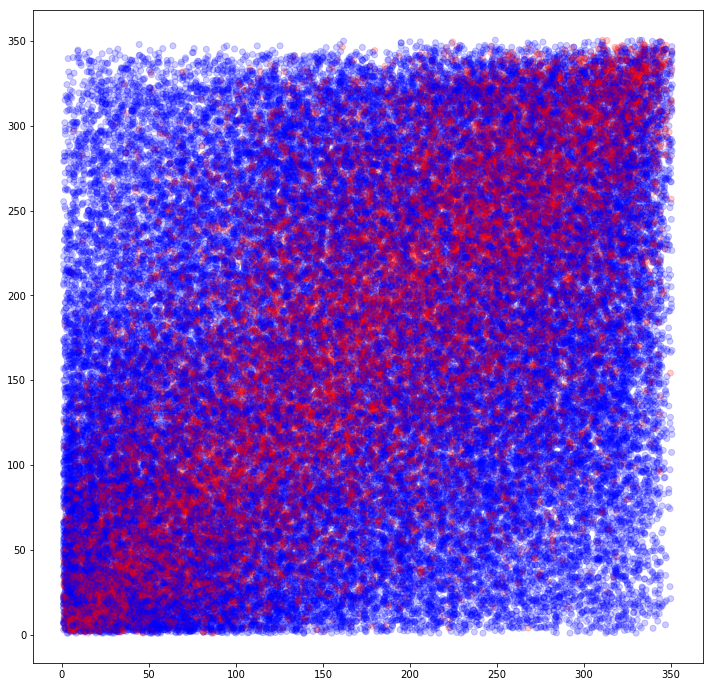

In [33]:
upSet =((df_train['Win']==1) & (df_train['Rank1'] > df_train['Rank2'])) | ((df_train['Win']==0) & (df_train['Rank1'] < df_train['Rank2']))
plotColor = [colors[(itr)] for itr in upSet]

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()
ax.scatter(df_train['Rank1'], df_train['Rank2'], c=plotColor, alpha=0.2)

### Tournament (just showing top 20 teams)

In [34]:
df_test_top_20 = df_test[(df_test['Rank1'] < 20) & (df_test['Rank2'] < 20)]

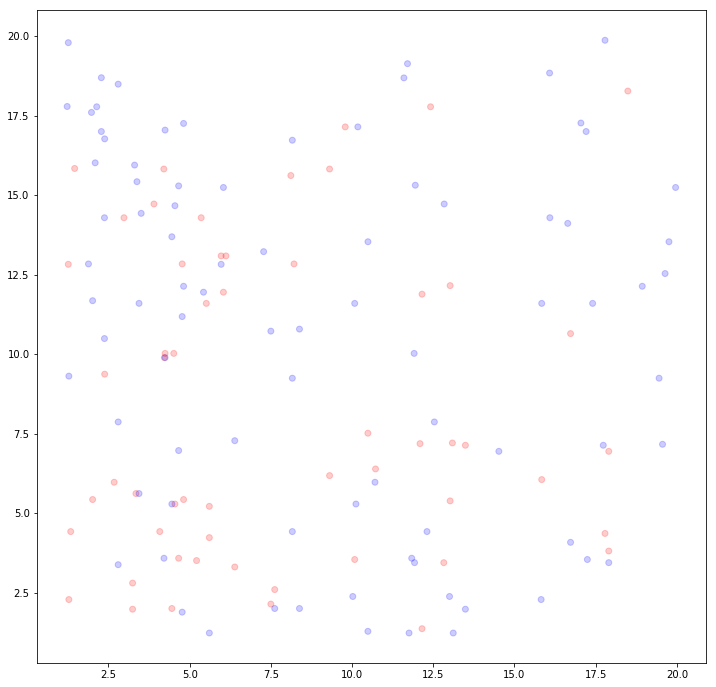

In [35]:
upSet =((df_test_top_20['Win']==1) & (df_test_top_20['Rank1'] > df_test_top_20['Rank2'])) | ((df_test_top_20['Win']==0) & (df_test_top_20['Rank1'] < df_test_top_20['Rank2']))
plotColor = [colors[(itr)] for itr in upSet]

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()
ax.scatter(df_test_top_20['Rank1'], df_test_top_20['Rank2'], c=plotColor, alpha=0.2)

## Using AvgWinMargin to estimate Wins

### Regular Season

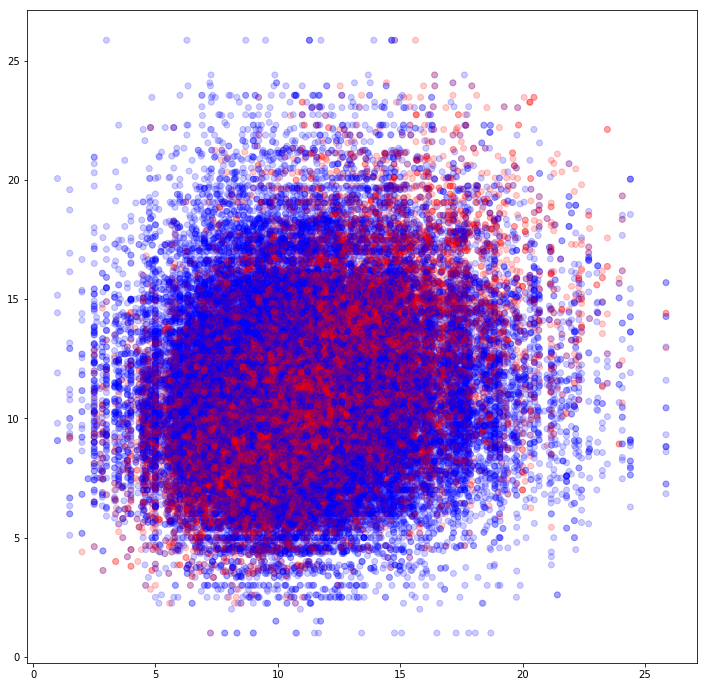

In [36]:
upSet =((df_train['Win']==1) & (df_train['AvgWinMargin1'] < df_train['AvgWinMargin2'])) | ((df_train['Win']==0) & (df_train['AvgWinMargin1'] > df_train['AvgWinMargin2']))
plotColor = [colors[(itr)] for itr in upSet]

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()
ax.scatter(df_train['AvgWinMargin1'], df_train['AvgWinMargin2'], c=plotColor, alpha=0.2)

### Tournament

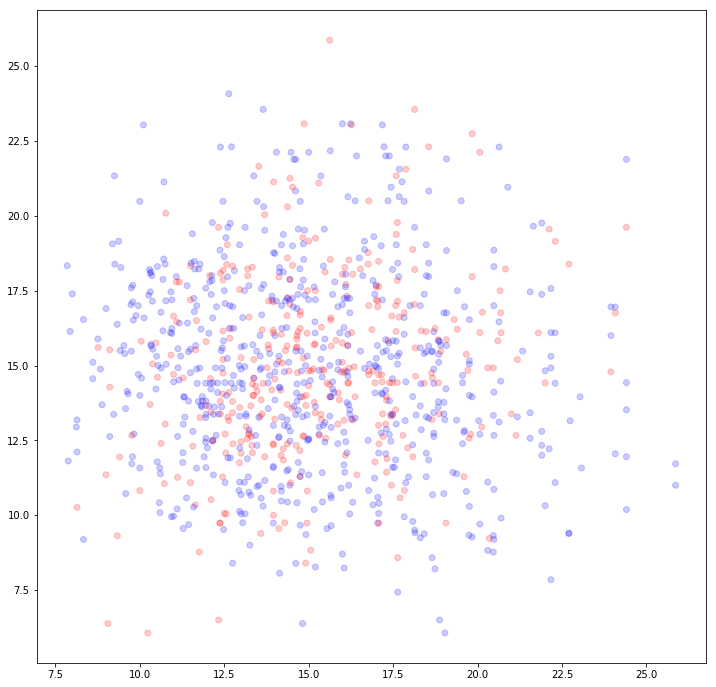

In [37]:
upSet =((df_test['Win']==1) & (df_test['AvgWinMargin1'] < df_test['AvgWinMargin2'])) | ((df_test['Win']==0) & (df_test['AvgWinMargin1'] > df_test['AvgWinMargin2']))
plotColor = [colors[(itr)] for itr in upSet]

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()
ax.scatter(df_test['AvgWinMargin1'], df_test['AvgWinMargin2'], c=plotColor, alpha=0.2)

## Using AvgLoseMargin to estimate Wins

### Regular Season

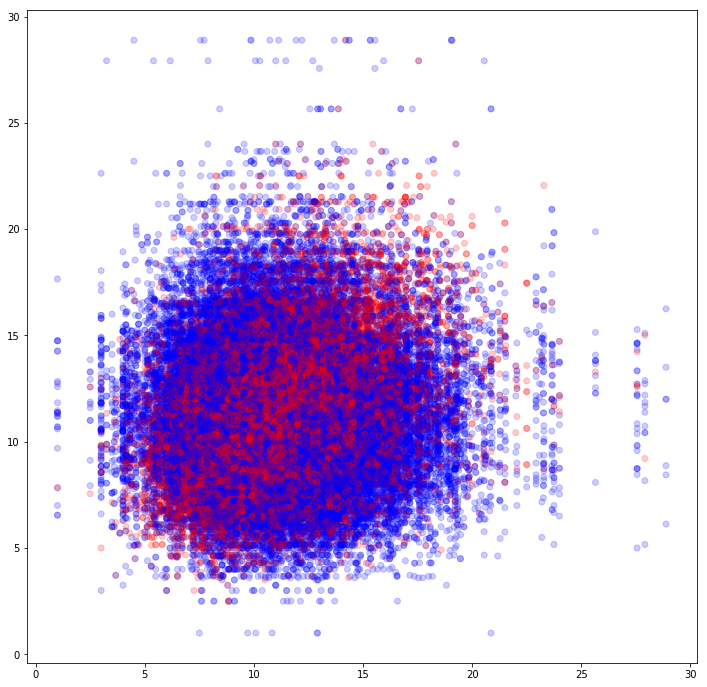

In [38]:
upSet =((df_train['Win']==1) & (df_train['AvgLoseMargin1'] > df_train['AvgLoseMargin2'])) | ((df_train['Win']==0) & (df_train['AvgLoseMargin1'] < df_train['AvgLoseMargin2']))
plotColor = [colors[(itr)] for itr in upSet]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()
ax.scatter(df_train['AvgLoseMargin1'], df_train['AvgLoseMargin2'], c=plotColor, alpha=0.2)

### Tournament

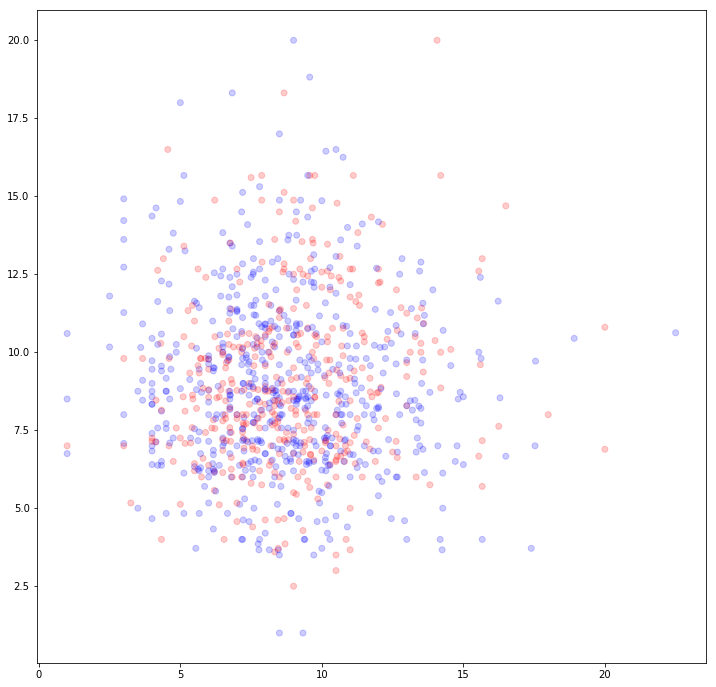

In [39]:
upSet =((df_test['Win']==1) & (df_test['AvgLoseMargin1'] > df_test['AvgLoseMargin2'])) | ((df_test['Win']==0) & (df_test['AvgLoseMargin1'] < df_test['AvgLoseMargin2']))
plotColor = [colors[(itr)] for itr in upSet]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()
ax.scatter(df_test['AvgLoseMargin1'], df_test['AvgLoseMargin2'], c=plotColor, alpha=0.2)

## Using TwoPointPct to estimate Wins

### Regular Season

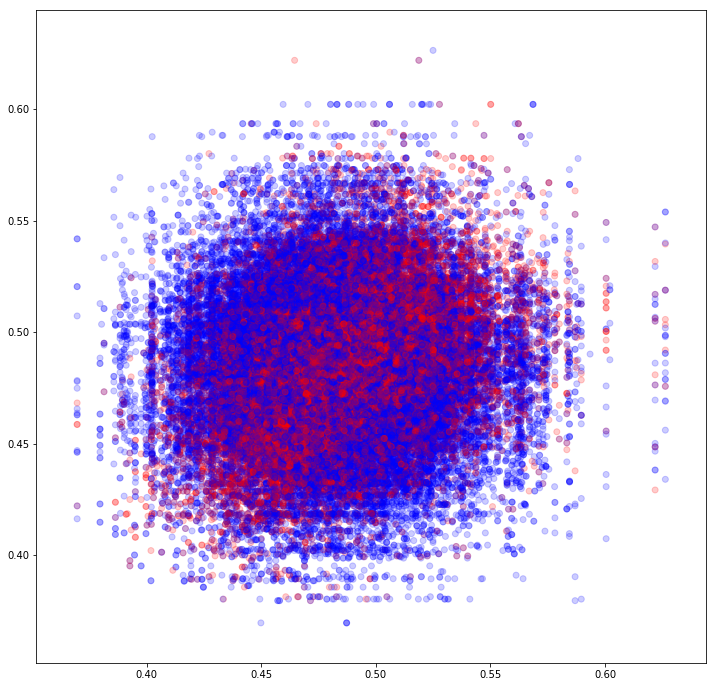

In [40]:
upSet =((df_train['Win']==1) & (df_train['TwoPointPct1'] < df_train['TwoPointPct2'])) | ((df_train['Win']==0) & (df_train['TwoPointPct1'] > df_train['TwoPointPct2']))
plotColor = [colors[(itr)] for itr in upSet]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()
ax.scatter(df_train['TwoPointPct1'], df_train['TwoPointPct2'], c=plotColor, alpha=0.2)

### Tournament

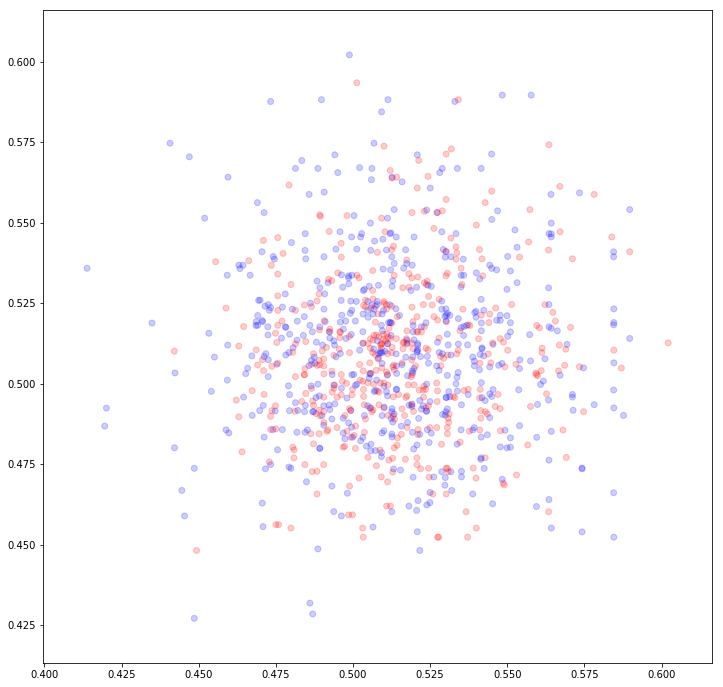

In [41]:
upSet =((df_test['Win']==1) & (df_test['TwoPointPct1'] < df_test['TwoPointPct2'])) | ((df_test['Win']==0) & (df_test['TwoPointPct1'] > df_test['TwoPointPct2']))
plotColor = [colors[(itr)] for itr in upSet]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()
ax.scatter(df_test['TwoPointPct1'], df_test['TwoPointPct2'], c=plotColor, alpha=0.2)

## Using ThreePointPct to estimate Wins

### Regular Season

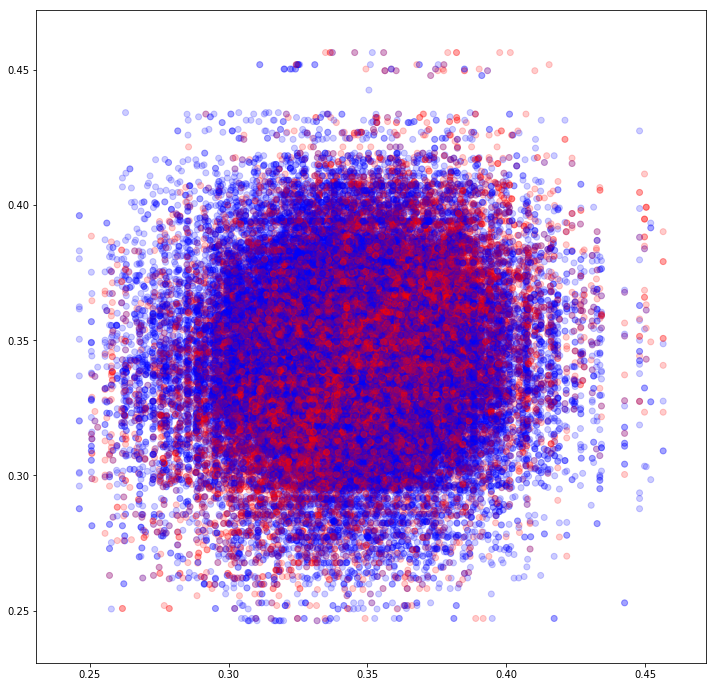

In [42]:
upSet =((df_train['Win']==1) & (df_train['ThreePointPct1'] < df_train['ThreePointPct2'])) | ((df_train['Win']==0) & (df_train['ThreePointPct1'] > df_train['ThreePointPct2']))
plotColor = [colors[(itr)] for itr in upSet]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()
ax.scatter(df_train['ThreePointPct1'], df_train['ThreePointPct2'], c=plotColor, alpha=0.2)

### Tournament

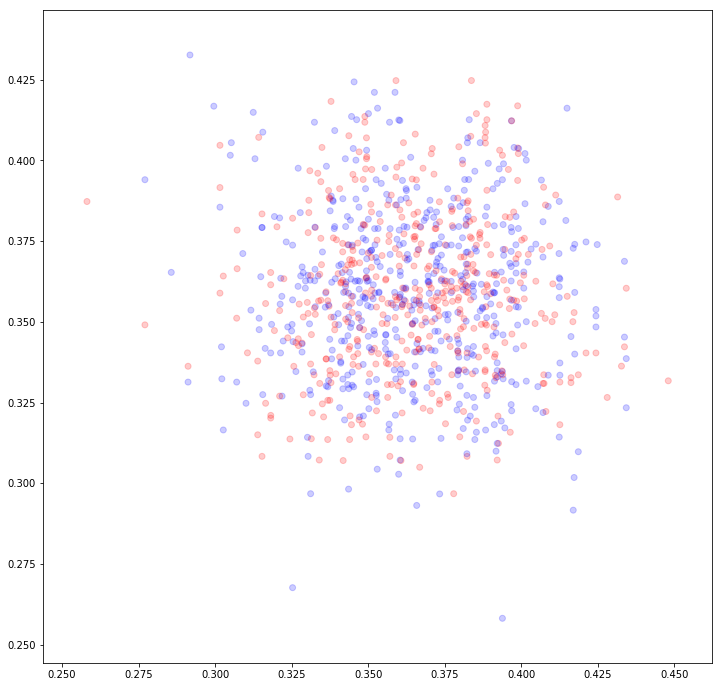

In [43]:
upSet =((df_test['Win']==1) & (df_test['ThreePointPct1'] < df_test['ThreePointPct2'])) | ((df_test['Win']==0) & (df_test['ThreePointPct1'] > df_test['ThreePointPct2']))
plotColor = [colors[(itr)] for itr in upSet]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()
ax.scatter(df_test['ThreePointPct1'], df_test['ThreePointPct2'], c=plotColor, alpha=0.2)

## Using FreeThrowPct to estimate Wins

### Regular Season

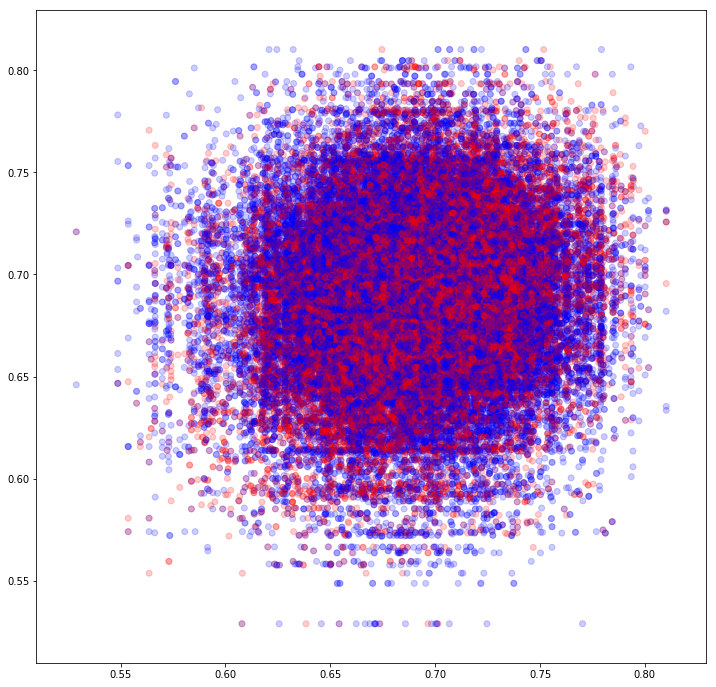

In [44]:
upSet =((df_train['Win']==1) & (df_train['FreeThrowPct1'] < df_train['FreeThrowPct2'])) | ((df_train['Win']==0) & (df_train['FreeThrowPct1'] > df_train['FreeThrowPct2']))
plotColor = [colors[(itr)] for itr in upSet]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()
ax.scatter(df_train['FreeThrowPct1'], df_train['FreeThrowPct2'], c=plotColor, alpha=0.2)

### Tournament

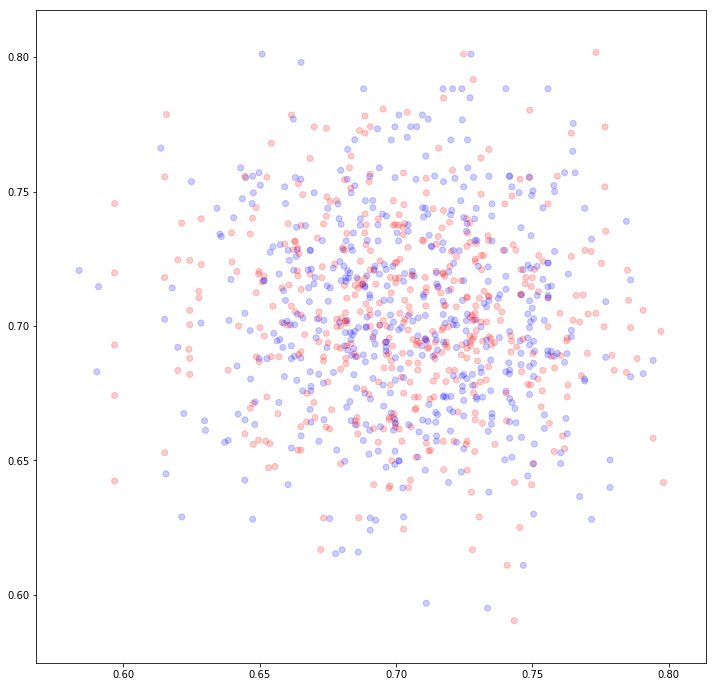

In [45]:
upSet =((df_test['Win']==1) & (df_test['FreeThrowPct1'] < df_test['FreeThrowPct2'])) | ((df_test['Win']==0) & (df_test['FreeThrowPct1'] > df_test['FreeThrowPct2']))
plotColor = [colors[(itr)] for itr in upSet]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()
ax.scatter(df_test['FreeThrowPct1'], df_test['FreeThrowPct2'], c=plotColor, alpha=0.2)

## Using OffensiveRebounds to estimate Wins

### Regular Season

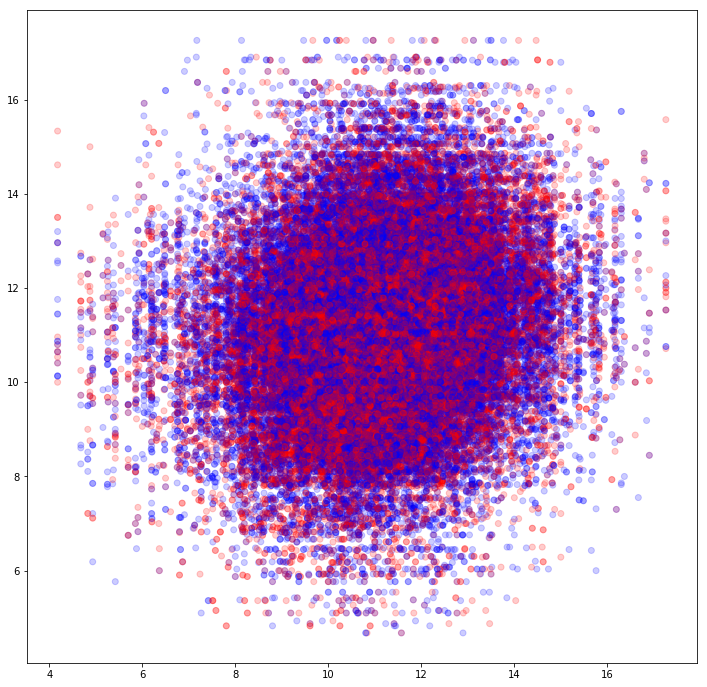

In [46]:
upSet =((df_train['Win']==1) & (df_train['OffensiveRebounds1'] < df_train['OffensiveRebounds2'])) | ((df_train['Win']==0) & (df_train['OffensiveRebounds1'] > df_train['OffensiveRebounds2']))
plotColor = [colors[(itr)] for itr in upSet]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()
ax.scatter(df_train['OffensiveRebounds1'], df_train['OffensiveRebounds2'], c=plotColor, alpha=0.2)

### Tournament

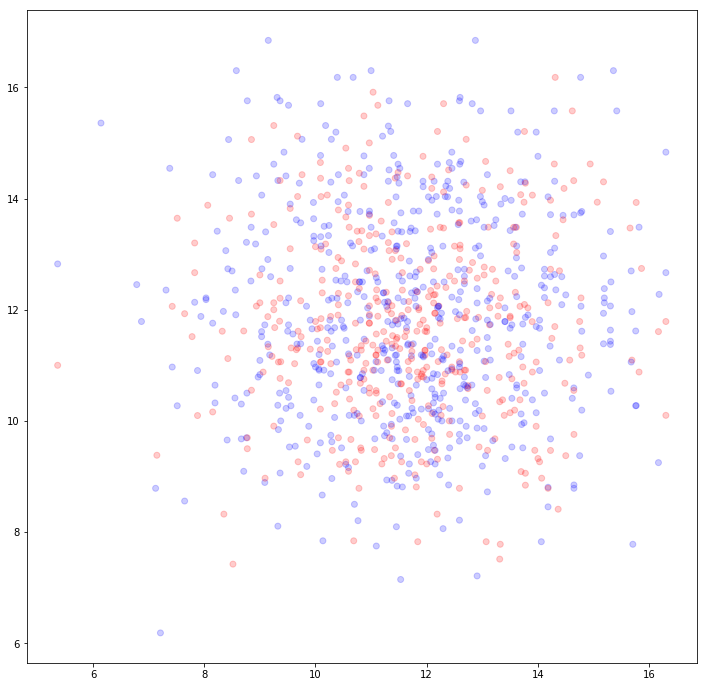

In [47]:
upSet =((df_test['Win']==1) & (df_test['OffensiveRebounds1'] < df_test['OffensiveRebounds2'])) | ((df_test['Win']==0) & (df_test['OffensiveRebounds1'] > df_test['OffensiveRebounds2']))
plotColor = [colors[(itr)] for itr in upSet]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()
ax.scatter(df_test['OffensiveRebounds1'], df_test['OffensiveRebounds2'], c=plotColor, alpha=0.2)

## Using DefensiveRebounds to estimate Wins

### Regular Season

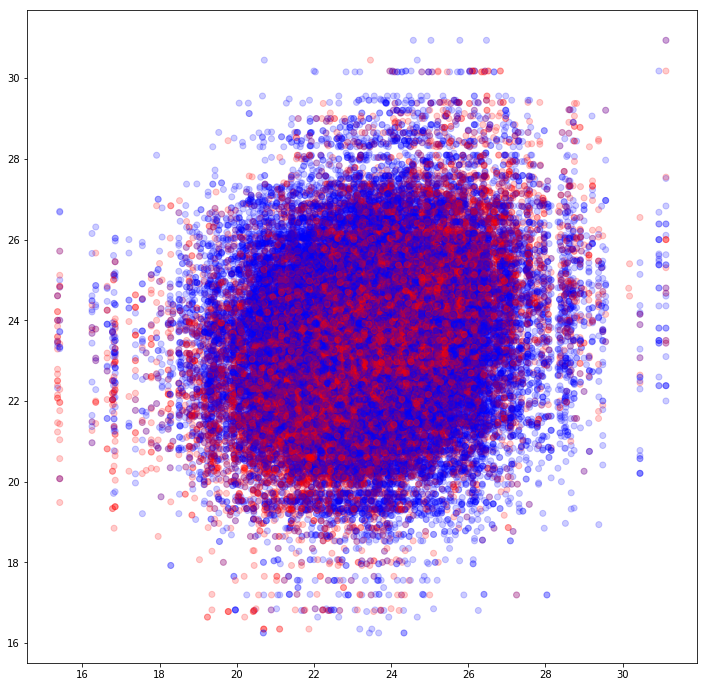

In [48]:
upSet =((df_train['Win']==1) & (df_train['DefensiveRebounds1'] < df_train['DefensiveRebounds2'])) | ((df_train['Win']==0) & (df_train['DefensiveRebounds1'] > df_train['DefensiveRebounds2']))
plotColor = [colors[(itr)] for itr in upSet]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()
ax.scatter(df_train['DefensiveRebounds1'], df_train['DefensiveRebounds2'], c=plotColor, alpha=0.2)

### Tournament

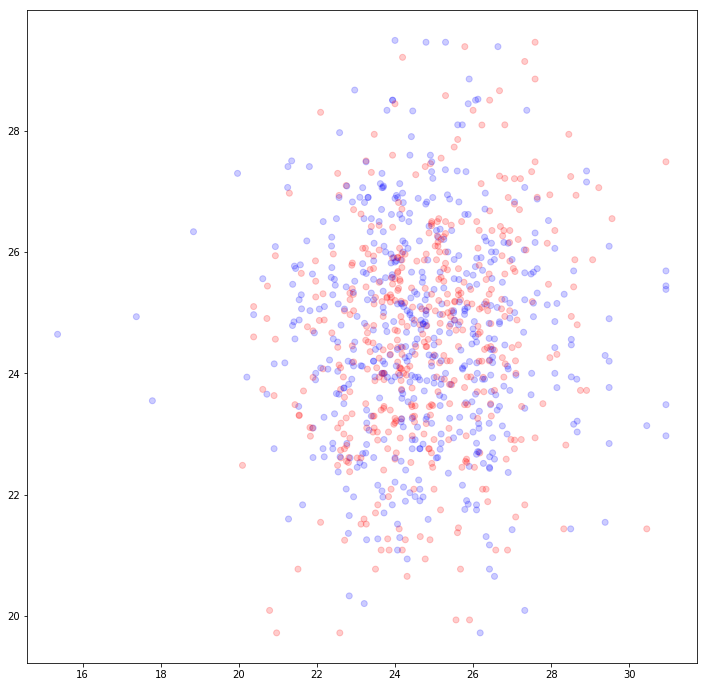

In [49]:
upSet =((df_test['Win']==1) & (df_test['DefensiveRebounds1'] < df_test['DefensiveRebounds2'])) | ((df_test['Win']==0) & (df_test['DefensiveRebounds1'] > df_test['DefensiveRebounds2']))
plotColor = [colors[(itr)] for itr in upSet]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()
ax.scatter(df_test['DefensiveRebounds1'], df_test['DefensiveRebounds2'], c=plotColor, alpha=0.2)